In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib import font_manager, rc

font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

In [3]:
df = pd.read_csv('c:/data/db/iris2.csv')

df.head()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Name,Species
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [4]:
df.shape

(150, 6)

In [5]:
df.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
df['Name'].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [7]:
df.groupby('Name').mean()

,Sepal Length,Sepal Width,Petal Length,Petal Width,Species
Name,,,,,
setosa,5.006,3.428,1.462,0.246,0
versicolor,5.936,2.770,4.260,1.326,1
virginica,6.588,2.974,5.552,2.026,2


Text(0, 0.5, 'Sepal Width')

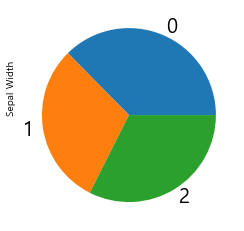

In [9]:
sums_by_species = df.groupby('Species').sum()
var = 'Sepal Width'
sums_by_species[var].plot(kind='pie', fontsize=20)
plt.ylabel(var, horizontalalignment='left')

         Sepal Length  Sepal Width  Petal Length  Petal Width
Species                                                      
0               250.3        171.4          73.1         12.3
1               296.8        138.5         213.0         66.3
2               329.4        148.7         277.6        101.3


<AxesSubplot:xlabel='Species'>

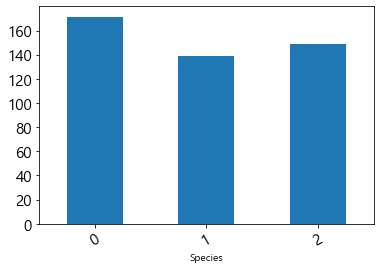

In [10]:
sums_by_species = df.groupby('Species').sum()
print(sums_by_species)
var = 'Sepal Width'
sums_by_species[var].plot(kind='bar', fontsize=15, rot=30)

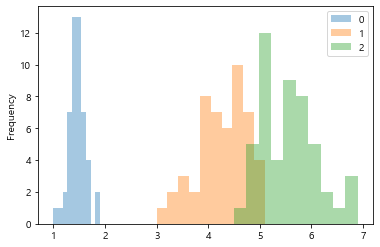

In [11]:
for spec in df['Species'].unique(): #중복값 제거
    subdf = df[df['Species']==spec]
    subdf['Petal Length'].plot(kind='hist', alpha=0.4, label=spec)

plt.legend(loc='upper right')

In [12]:
df['Name'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: Name, dtype: int64

C:\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, '분류\n (0: setosa 1: versicolor 2: virginica)')

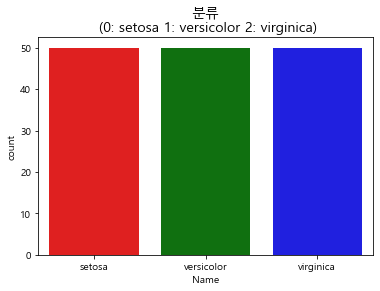

In [13]:
import seaborn as sns

colors = ['red', 'green', 'blue']
sns.countplot('Name', data=df, palette=colors)
plt.title('분류\n (0: setosa 1: versicolor 2: virginica)', fontsize=14)

In [14]:
cols = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
X = df[cols]
y = df['Species']

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
model = LogisticRegression(max_iter=1000) #max_iter 최대반복횟수
model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [16]:
print('학습용:', model.score(X_train, y_train))
print('검증용:', model.score(X_test, y_test))

학습용: 0.9666666666666667
검증용: 1.0


In [17]:
#confusion matrix(혼동행렬, 오분류표) 출력
from sklearn.metrics import confusion_matrix
pred = model.predict(X_test)
cm = confusion_matrix(y_test, pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [18]:
df_cm = pd.DataFrame(cm, index=[0,1,2], columns=[0,1,2])
df_cm

,0,1,2
0,11,0,0
1,0,13,0
2,0,0,6


<AxesSubplot:title={'center':'confusion_matrix'}>

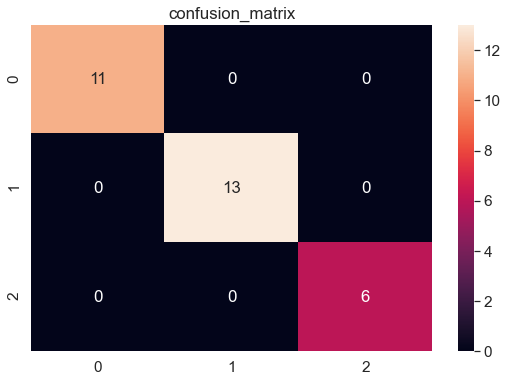

In [20]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

sns.set(font_scale=1.4)
plt.figure(figsize=(9,6))
plt.title('confusion_matrix')
sns.heatmap(df_cm, annot=True)

In [24]:
df.Species.unique()

array([0, 1, 2], dtype=int64)

In [25]:
X_new=[[7,3.0,5,1.4]]
pred = model.predict(X_new)
print('품종:', df.Species.unique()[pred[0]])

품종: 1


In [26]:
import joblib
joblib.dump(model, 'c:/data/db/iris_logit.model')

['c:/data/db/iris_logit.model']

In [28]:
# iris 모형 불러오기
import joblib
model = joblib.load('c:/data/db/iris_logit.model')

In [29]:
flowers = ['setosa', 'versicolor', 'virginica']
X_new = [[7,3.0,5,1.4]]
pred = model.predict(X_new)
print('품종: ', flowers[pred[0]])

품종:  versicolor


In [31]:
X_new=[[5,2.9,1,0.2]]
pred = model.predict(X_new)
print('품종:', flowers[pred[0]])

품종: setosa
